<a href="https://colab.research.google.com/github/Latamila/Latamila/blob/main/acessoSuspeito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DETECTANDO ACESSOS SUSPEITOS E MALICIOSOS EM APLICAÇÕES WEB

In [ ]:
!pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 2500)

In [ ]:
%reload_ext watermark
%watermark -a 'Data Science Academy' --iversions

Author: Data Science Academy

matplotlib: 3.7.1
numpy     : 1.22.4
pandas    : 1.5.3



In [ ]:
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
dados = pd.read_csv('dataset.csv', delim_whitespace = True)

In [ ]:
dados.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

In [ ]:
dados.shape

(70315, 15)

In [ ]:
dados.sample(5)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
28844,2022-01-13,14:26:17,57.222.145.109,GET,transactions.aspx,page=2,443,vu469073,193.163.122.33,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...,https://bankofpunk.local/account_status.aspx,200,0,0,25
32081,2022-01-14,21:26:28,57.222.145.109,GET,dutjqhvv.css,-,443,qj477105,166.49.174.100,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...,https://bankofpunk.local/transactions.aspx,404,0,0,30
28200,2022-01-13,09:37:29,57.222.145.109,GET,login.aspx,-,443,-,194.140.225.115,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,200,0,0,27
46442,2022-01-21,00:11:04,57.222.145.109,GET,template.css,v=sityihtz,443,-,195.112.31.41,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,200,0,0,25
39574,2022-01-18,02:40:02,57.222.145.109,GET,main.css,-,443,wx933457,57.251.95.47,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/account_status.aspx,200,0,0,24


In [ ]:
analise1 = pd.DataFrame()

In [ ]:
analise1['cs(User-Agent)'] = pd.DataFrame(dados['cs(User-Agent)'].unique())

In [ ]:
analise1

,cs(User-Agent)
0,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...
1,Mozilla/5.0+(Windows+NT+10.0)+AppleWebKit/537....
2,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...
3,Mozilla/5.0+(compatible;+MSIE+10.0;+Windows+NT...
4,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...
5,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_1_4+like...
6,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...
7,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...
8,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...
9,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...


In [ ]:
#filtra se há uso de proxy

analise1['Proxy_user'] = pd.DataFrame(dados['cs(User-Agent)'].str.contains('_via_'))

In [ ]:
analise1.sample(5)

,cs(User-Agent),Proxy_user
124,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4+like+M...,False
142,Mozilla/4.0+(compatible;+MSIE+5.0;+Windows+98;...,False
72,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_7+like+M...,False
71,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,False
143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0_1+like...,False


In [ ]:
analise1['Proxy_user'].value_counts()

False    152
Name: Proxy_user, dtype: int64

In [ ]:
analise2 = pd.DataFrame()

In [ ]:
analise2['cs-username'] = pd.DataFrame(dados['cs-username'].unique())

In [ ]:
analise2.shape

(1014, 1)

In [ ]:
analise2.sample(5)

,cs-username
793,aj357720
210,re306740
435,xb531166
844,ze363731
635,vw682199


In [ ]:
analise2 = dados[dados['cs-username'].str.contains('-')]

In [ ]:
analise2['cs-username'].value_counts()

-    27500
Name: cs-username, dtype: int64

In [ ]:
analise2.sample(5)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
1313,2022-01-01,16:41:35,57.222.145.109,GET,main.css,-,443,-,80.169.97.4,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_1+like...,https://bankofpunk.local/index.aspx,200,0,0,21
61694,2022-01-27,10:08:00,57.222.145.109,GET,index.aspx,-,443,-,195.110.67.175,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200,0,0,22
9597,2022-01-05,12:36:22,57.222.145.109,GET,temcujtu.css,-,443,-,45.66.36.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_3_1+like...,https://bankofpunk.local/index.aspx,200,0,0,26
2332,2022-01-02,09:23:00,57.222.145.109,GET,index.aspx,-,443,-,91.199.136.74,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200,0,0,22
27698,2022-01-12,21:18:18,57.222.145.109,GET,favico.ico,-,443,-,195.219.106.41,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,200,0,0,26


resultado da analise:

o total de acessos de usuarios nao autenticados é baixo em relação ao total de acessos. como isso nao é garantia de acesso nao suspeito ou malicioso, vamos seguir investigando.

quais endereços ip de clientes tiveram maior volume de acessos? isso pode indicar eventuais problemas ou anormais.

In [ ]:
dados.sample(5)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
15622,2022-01-07,20:22:52,57.222.145.109,GET,transactions.aspx,page=1,443,co695015,64.43.80.238,Mozilla/4.0+(compatible;+MSIE+5.0;+Windows+98;...,https://bankofpunk.local/transactions.aspx,200,0,0,23
66858,2022-01-29,15:17:00,57.222.145.109,GET,footer.css,-,443,-,83.151.197.83,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_1_2+like...,-,200,0,0,23
1066,2022-01-01,14:53:11,57.222.145.109,GET,dmjiqnon.css,-,443,-,213.199.157.10,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4+like+M...,https://bankofpunk.local/index.aspx,200,0,0,27
39630,2022-01-18,07:16:07,57.222.145.109,GET,fqmtorzd.js,v=823888,443,-,80.86.191.7,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,23
27789,2022-01-12,21:36:11,57.222.145.109,GET,anxwdpzp.js,v=777289,443,-,185.61.99.29,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_2+like+M...,https://bankofpunk.local/transactions.aspx,200,0,0,20


In [ ]:
analise3 = pd.DataFrame()

In [ ]:
analise3['Count-Client-IP'] = pd.value_counts(dados['c-ip']).head()

In [ ]:
analise3

,Count-Client-IP
103.211.182.34,244
217.15.114.98,144
82.206.244.38,143
185.97.213.168,141
16.8.69.88,139


resultado da analise:

observamos que o ip:103.211.182.34 tem o maio rnumero de interações com o servidor.

In [ ]:
analise3_ip1 = dados[dados['c-ip'].str.contains('103.211.182.34')]

In [ ]:
analise3_ip1.shape

(244, 15)

In [ ]:
analise3_ip1.head(20)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
66387,2022-01-29,13:44:00,57.222.145.109,GET,eiownzdh.css,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,20
66388,2022-01-29,13:44:00,57.222.145.109,GET,index.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,301,0,0,29
66393,2022-01-29,13:44:16,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/index.aspx,401,0,0,23
66394,2022-01-29,13:44:19,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,26
66395,2022-01-29,13:44:22,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,28
66396,2022-01-29,13:44:24,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,27
66397,2022-01-29,13:44:27,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,27
66398,2022-01-29,13:44:30,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,30
66399,2022-01-29,13:44:31,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,20
66400,2022-01-29,13:44:33,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,20


varios metodos post na coluna **cs-method** podem ser observados durante a analise do c-ip 103.211.182.34 onde **cs-url-stem** é **login.aspx** e a maioria dos sc-status são 401.

o codigo de status de resposta nao autorizada 401 do hypertext transfer protocol(http) indica que a solicitação do cliente nao foi concluida porque nao possui credenciais de autenticação validas para o recurso solicitado.

durante um periodo de tempo muito curto, esse volume de requisições de metodos post em login.aspx parece suspeito.



In [ ]:
analise3_ip2 = dados[dados['c-ip'].str.contains('217.15.114.98')]

In [ ]:
analise3_ip2.head(20)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
31159,2022-01-14,13:51:00,57.222.145.109,GET,template.css,v=ogftkdfg,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,23
31160,2022-01-14,13:51:00,57.222.145.109,GET,iztyzubx.js,v=724159,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,30
31161,2022-01-14,13:51:00,57.222.145.109,GET,favico.ico,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,23
31162,2022-01-14,13:51:00,57.222.145.109,GET,index.aspx,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,21
31163,2022-01-14,13:51:07,57.222.145.109,GET,pjkvkshx.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,404,0,0,26
31164,2022-01-14,13:51:07,57.222.145.109,GET,rdzwevzx.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,200,0,0,27
31165,2022-01-14,13:51:07,57.222.145.109,GET,index.aspx,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,200,0,0,26
31166,2022-01-14,13:51:23,57.222.145.109,GET,uwnlhdwe.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,200,0,0,27
31167,2022-01-14,13:51:23,57.222.145.109,GET,phvzqtes.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,404,0,0,24
31168,2022-01-14,13:51:23,57.222.145.109,GET,cdgxrwsy.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,404,0,0,23


o numero de acessos nao é garantia de acesso suspeito.

o padrao entre os endereços ip nao é o mesmo, entao devemos
focar em cs-method e sc-status buscando POST ou 401, respectivamente.



In [ ]:
analise4_scstatus = pd.DataFrame()

In [ ]:
analise4_scstatus['sc-status_Count'] = (dados['sc-status'].value_counts())

In [ ]:
analise4_scstatus

,sc-status_Count
200,59070
404,5909
301,4653
401,683


<Axes: >

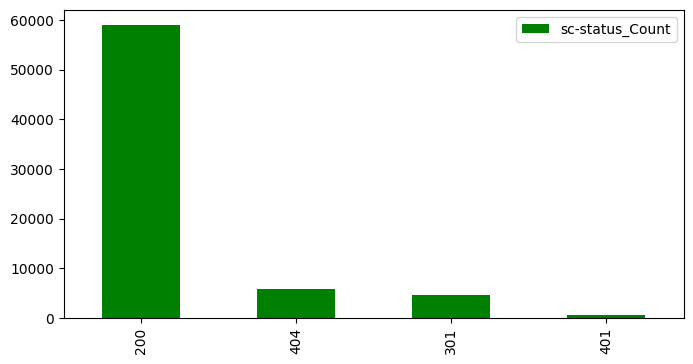

In [ ]:
analise4_scstatus.plot(kind = 'bar',
                       figsize = (8,4),
                       color = 'green')

o resutado da analise:

existem 4 tipos de sc-status existentes no conjunto de dados.
o sc-status 200 refere-se a pedidos aceitos com sucesso pelo servidor. era esperado que este fosse o status com maior volume nos dados.
o codigo 404 é arquqivo nao encontrado.
o codigo 301 é redirecionamento de url.
o codigo 401 indica problema

In [ ]:
analise4_csmethod = pd.DataFrame()


In [ ]:
analise4_csmethod['cs-method_Count'] = (dados['cs-method'].value_counts())

In [ ]:
analise4_csmethod

,cs-method_Count
GET,67202
POST,3113


basicamente, post é usado para enviar dados para um servidor e GET é usado para solicitar dados de um recurso especificado. alto volumen de requisições POST em um curto espaço de tempo podem indicar acesso suspeito.



In [ ]:
df_filtro = pd.DataFrame(dados)

In [ ]:
df_filtro.drop(['s-ip',
               's-port',
               'cs(User-Agent)',
               'cs(Referer)',
               'sc-substatus',
               'sc-win32-status'], axis = 1,
               inplace = True)

vamos filtrar os acessos com requisições de metodo POST e fazer um agrupamentoo por endereço ip do cliente.

In [ ]:
analise5 = df_filtro.loc[df_filtro['cs-method'] == 'POST'].groupby(pd.Grouper(key = 'c-ip', axis = 0))['cs-method'].value_counts().reset_index(name = 'Counts')

In [ ]:
analise5.sort_values(by = 'Counts', ascending = False).head(10)

,c-ip,cs-method,Counts
995,103.211.182.34,POST,180
846,45.84.89.130,POST,67
1009,160.116.57.249,POST,46
27,194.12.8.149,POST,11
159,193.164.167.94,POST,10
64,185.97.213.168,POST,10
362,154.14.15.237,POST,9
294,199.42.180.92,POST,8
620,193.24.26.211,POST,8
217,193.150.120.222,POST,8


<Axes: xlabel='c-ip'>

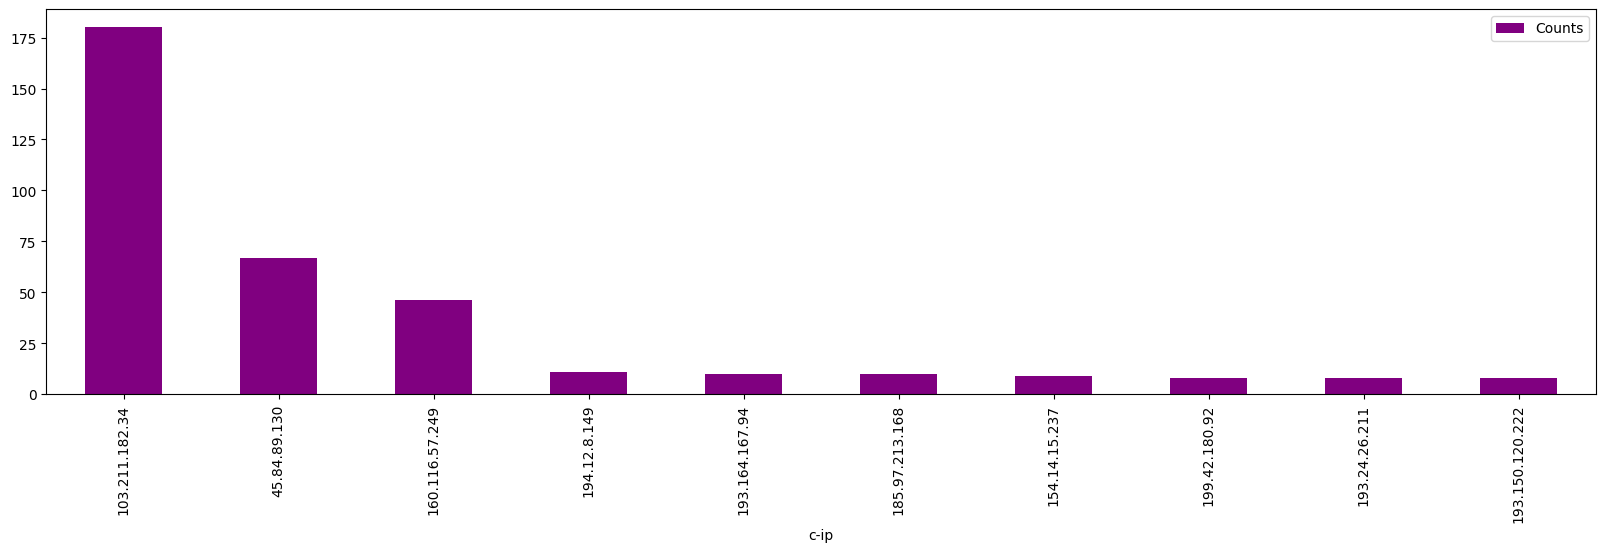

In [ ]:
analise5.sort_values(by = 'Counts',
                     ascending = False).head(10).plot(x = 'c-ip',
                                                      y = 'Counts',
                                                      kind = 'bar',
                                                      figsize = (20,5),
                                                      color = 'purple')

o grafico mostra 3 endereços ip foram os que tiveram maior numero de acessos com requisições de metodo POST. ISSO indica tentativa de login por força bruta para obter username ou senha. vamos analisar isso em mais detalhes para a pagina login.aspx

VAMOS VERIFICAR SE ESTÁ HAVENDO TENTAIVA DE LOGIN POR FORÇA BRUTA. USAREMOS O DATAFRAME df_filtro DO ITEM ANTERIOR COMO PONTO DE PARTIDA.



In [ ]:
analise6 = df_filtro.loc[df_filtro['cs-uri-stem'] ==  'login.aspx'].groupby(pd.Grouper(key = 'c-ip',
                                                                                       axis = 0))['cs-uri-stem'].value_counts().reset_index(name= 'Counts')

In [ ]:
analise6.sort_values(by = 'Counts', ascending = False).head(10)

,c-ip,cs-uri-stem,Counts
995,103.211.182.34,login.aspx,174
846,45.84.89.130,login.aspx,61
1009,160.116.57.249,login.aspx,40
27,194.12.8.149,login.aspx,12
159,193.164.167.94,login.aspx,12
362,154.14.15.237,login.aspx,11
234,57.246.165.107,login.aspx,10
169,207.117.196.232,login.aspx,10
620,193.24.26.211,login.aspx,10
64,185.97.213.168,login.aspx,10


<Axes: xlabel='c-ip'>

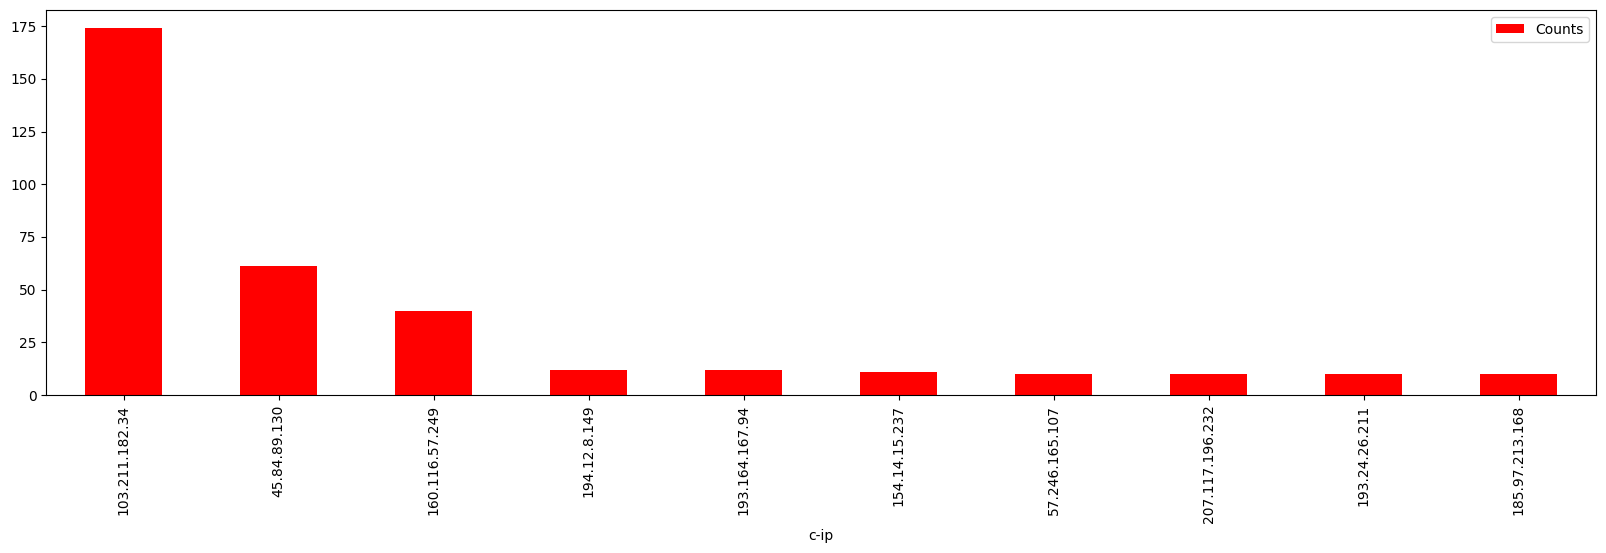

In [ ]:
analise6.sort_values(by = 'Counts',
                     ascending = False).head(10).plot(x = 'c-ip',
                                                      y = 'Counts',
                                                      kind = 'bar',
                                                      figsize = (20,5),
                                                      color = 'red')

In [ ]:
analise7_ip1 = df_filtro.loc[df_filtro['c-ip'] ==  '103.211.182.34'].groupby(pd.Grouper(key = 'cs-uri-stem',
                                                                                       axis = 0))['sc-status'].value_counts().reset_index(name= 'Counts').head().sort_values(by = 'Counts',
                                                                                                                                                                             ascending = False).head()

In [ ]:
analise7_ip1.head()

,cs-uri-stem,sc-status,Counts
2,login.aspx,401,173
0,eiownzdh.css,200,1
1,index.aspx,301,1
3,login.aspx,301,1
4,sybwkkcf.css,200,1


<Axes: xlabel='sc-status'>

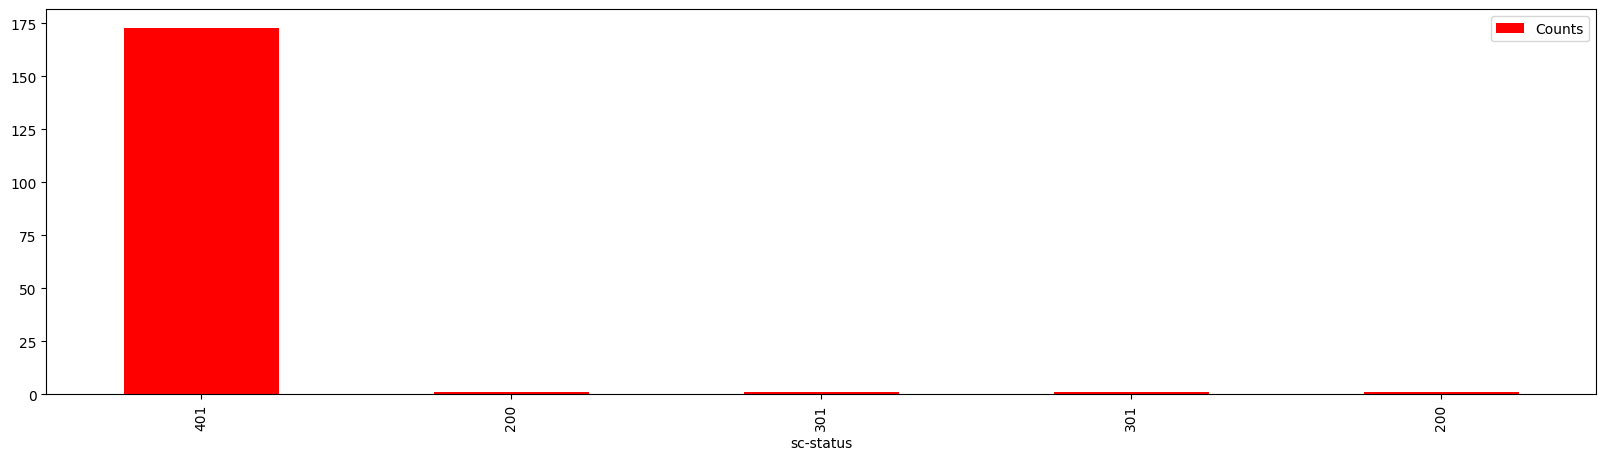

In [ ]:
analise7_ip1.plot(x = 'sc-status',
              y = 'Counts',
              kind = 'bar',
              figsize = (20,5),
              color = 'red')

este é um ip suspeito pois fez 173 acessos à pagina em um curto periodo de tempo, o que indica um ataque de força bruta

In [ ]:
analise7_ip2 = df_filtro.loc[df_filtro['c-ip'] ==  '45.84.89.130'].groupby(pd.Grouper(key = 'cs-uri-stem',
                                                                                       axis = 0))['sc-status'].value_counts().reset_index(name= 'Counts').head().sort_values(by = 'Counts',
                                                                                                                                                                             ascending = False).head()

In [ ]:
analise7_ip2.head()

,cs-uri-stem,sc-status,Counts
4,login.aspx,401,60
1,template.css,200,9
0,gwzrmtvs.js,200,1
2,zfkvjtbd.js,200,1
3,index.aspx,301,1


<Axes: xlabel='sc-status'>

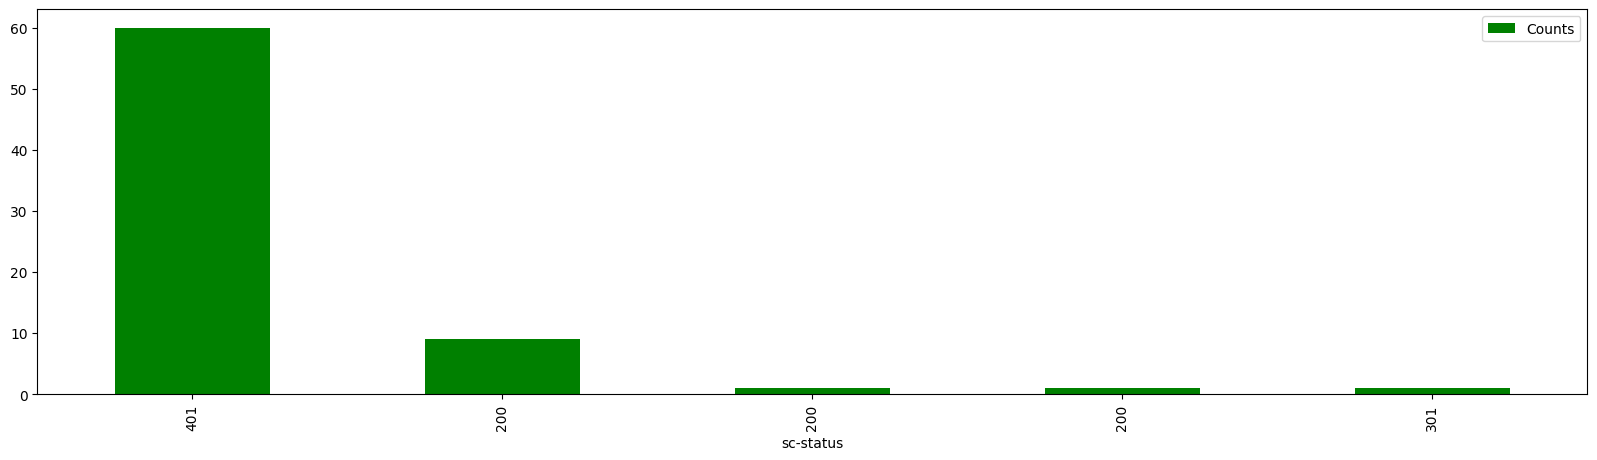

In [ ]:
analise7_ip2.plot(x = 'sc-status',
              y = 'Counts',
              kind = 'bar',
              figsize = (20,5),
              color = 'green')

In [ ]:
analise7_ip2 = dados[dados['c-ip'].str.contains('45.84.89.130')]

In [ ]:
analise7_ip2.head()

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
45294,2022-01-20,14:55:00,57.222.145.109,GET,gwzrmtvs.js,v=728188,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,25
45295,2022-01-20,14:55:00,57.222.145.109,GET,template.css,v=ffjwagua,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,22
45296,2022-01-20,14:55:00,57.222.145.109,GET,zfkvjtbd.js,v=761846,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,22
45297,2022-01-20,14:55:00,57.222.145.109,GET,index.aspx,-,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,301,0,0,23
45300,2022-01-20,14:55:10,57.222.145.109,POST,login.aspx,-,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/index.aspx,401,0,0,22


o endereço ip tambem acessa muitas vezes em um curto espaço de tempo e retorna 401. então a suspeita é tentativa de login por força bruta


In [ ]:
analise7_ip2 = df_filtro.loc[df_filtro['c-ip'] ==  '160.116.57.249'].groupby(pd.Grouper(key = 'cs-uri-stem',
                                                                                       axis = 0))['sc-status'].value_counts().reset_index(name= 'Counts').head().sort_values(by = 'Counts',
                                                                                                                                                                             ascending = False).head()

In [ ]:
analise7_ip2

,cs-uri-stem,sc-status,Counts
4,login.aspx,401,39
0,zjqcquyq.css,404,1
1,akyodcgk.css,404,1
2,nnuxmlih.css,200,1
3,index.aspx,301,1


<Axes: xlabel='sc-status'>

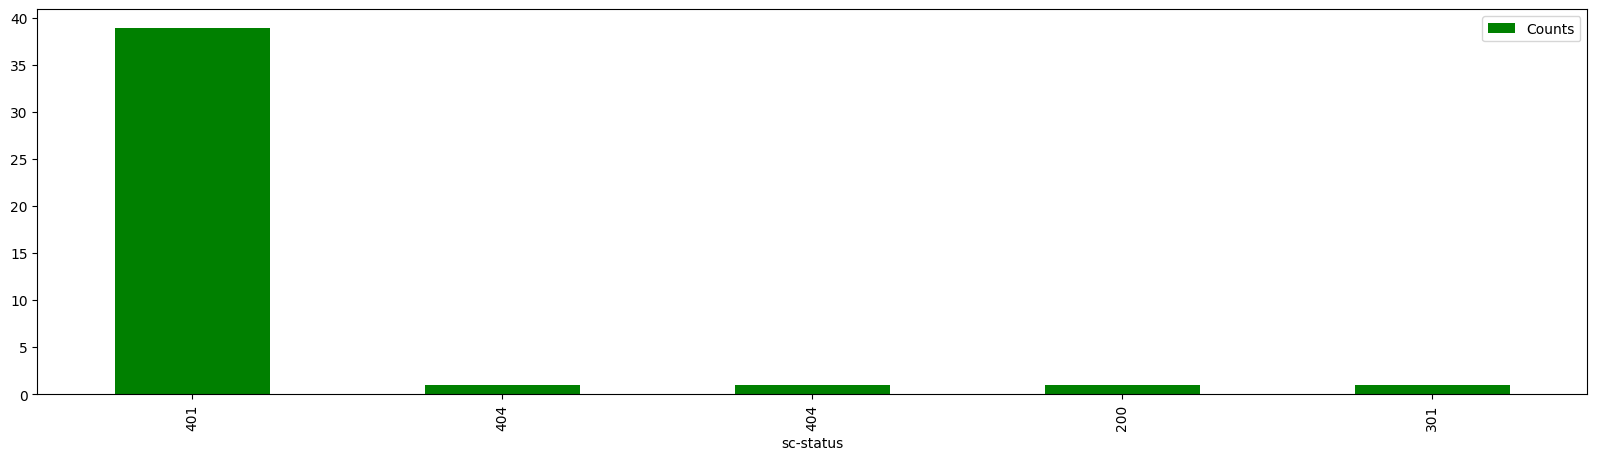

In [ ]:
analise7_ip2.plot(x = 'sc-status',
              y = 'Counts',
              kind = 'bar',
              figsize = (20,5),
              color = 'green')

**VERIFICANDO OS ARQUIVOS MAIS ACESSADOS NA APLICAÇÃO WEB**

Vamos analisar os arquivos mais acessados pelo ip = 103.211.182.34

In [ ]:
analise8 = {'cs-uri-stem' : ['login.aspx', 'eiownzdh.css',
                            'index.aspx',
                            'login.aspx',
                            'sybwkkcf.css'],
            'Count': [173,1,1,1,1],
            'sc-status': [401,200,301,301,200]}

In [ ]:
df_analise8 = pd.DataFrame(data = analise8)

In [ ]:
df_analise8

,cs-uri-stem,Count,sc-status
0,login.aspx,173,401
1,eiownzdh.css,1,200
2,index.aspx,1,301
3,login.aspx,1,301
4,sybwkkcf.css,1,200


**tomador de decisão quer ver os resultados de forma resumida**

In [ ]:
df = pd.DataFrame({'Count': [173,4],
                   'sc-status_&_uri_stem':['401(login.aspx)', 'Outros']},
                  index = ['401(login.aspx)','Outros'])

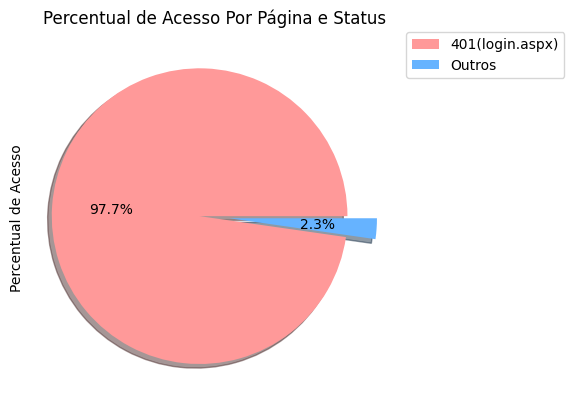

In [ ]:
colors = ['#ff9999', '#66b3ff']
ax = df.plot(kind = 'pie',
             autopct = '%1.1f%%',
             shadow = True,
             explode = [0.1,0.1],
             colors = colors,
             y = 'Count',
             legend = True,
             title = 'Percentual de Acesso Por Página e Status',
             ylabel = 'Percentual de Acesso',
             labeldistance = None)
ax.legend(bbox_to_anchor = (1,1.02), loc = 'upper left')
plt.show()

In [ ]:
df = pd.DataFrame({'Count': [60,12],
                   'sc-status_&_uri_stem':['401(login.aspx)', 'Outros']},
                  index = ['401(login.aspx)','Outros'])

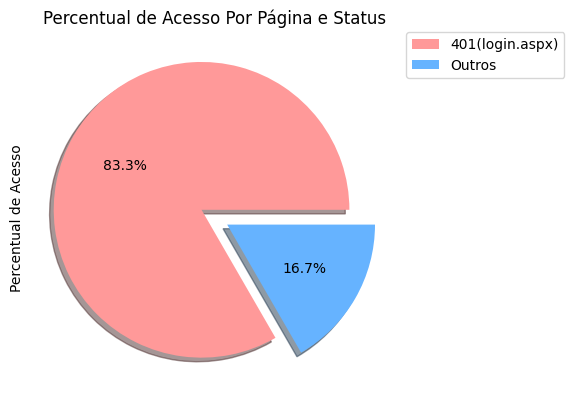

In [ ]:
colors = ['#ff9999', '#66b3ff']
ax = df.plot(kind = 'pie',
             autopct = '%1.1f%%',
             shadow = True,
             explode = [0.1,0.1],
             colors = colors,
             y = 'Count',
             legend = True,
             title = 'Percentual de Acesso Por Página e Status',
             ylabel = 'Percentual de Acesso',
             labeldistance = None)
ax.legend(bbox_to_anchor = (1,1.02), loc = 'upper left')
plt.show()

In [ ]:
df = pd.DataFrame({'Count': [39,4],
                   'sc-status_&_uri_stem':['401(login.aspx)', 'Outros']},
                  index = ['401(login.aspx)','Outros'])

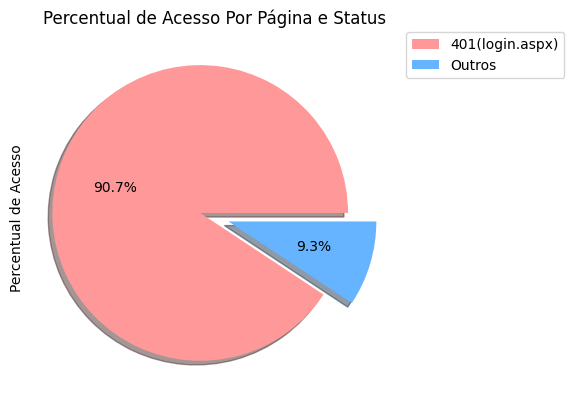

In [ ]:
colors = ['#ff9999', '#66b3ff']
ax = df.plot(kind = 'pie',
             autopct = '%1.1f%%',
             shadow = True,
             explode = [0.1,0.1],
             colors = colors,
             y = 'Count',
             legend = True,
             title = 'Percentual de Acesso Por Página e Status',
             ylabel = 'Percentual de Acesso',
             labeldistance = None)
ax.legend(bbox_to_anchor = (1,1.02), loc = 'upper left')
plt.show()

a pagina login é o alvo de acessos suspeitos.


**Os endereços IP abaixo apresentam acessos suspeitos e maliciosos á aplicaçao web, tentando obter acessso por força bruta.**



1.   103.211.182.34
2.   45.84.89.130
3.   160.116.57.249

A empresa pode entrar em contato com os provedores desses endereços IP a fim de obter mais detalhes ou mesmo bloquear os endereços.



#FIM